# "What are the trends of ghg emissions in the UK within each sector over time?"

Greenhouse Gas Emissions 

Hareem Nadeem (z54425310)

`imports`

In [19]:
import os
import geopandas as gpd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import json
import pandas as pd # data processing (CSV file - e.g. pd.read_csv)
from datetime import datetime


In [20]:
%matplotlib inline

In [21]:
plt.rcParams['figure.figsize'] = (50, 30)

In [22]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [34]:
#Loading my data (excel spreadsheet)
if os.path.isfile("ghg_data.csv"):
    filepath = "ghg_data.csv"
    print("loading from file")
else:
    filepath = "https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1087005/uk-local-authority-ghg-emissions-2020-dataset.csv"
    print("loading from the internet")

gd = pd.read_csv(filepath)
print("done")

loading from file
done


START HERE

In [6]:
gd.head(10)

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2e),Mid-year Population (thousands),Area (km2)
0,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Electricity,CH4,0.010737,0.000000,236.47,78.0311
1,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Electricity,CO2,0.380289,0.380289,236.47,78.0311
2,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Electricity,N2O,0.001710,0.000000,236.47,78.0311
3,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Gas,CH4,0.021121,0.000000,236.47,78.0311
4,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Gas,CO2,0.700438,0.700438,236.47,78.0311
5,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Gas,N2O,0.000558,0.000000,236.47,78.0311
6,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture 'Other',CH4,0.003186,0.000000,236.47,78.0311
7,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture 'Other',CO2,0.792025,0.792025,236.47,78.0311
8,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture 'Other',N2O,0.009533,0.000000,236.47,78.0311
9,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Soils,CO2,0.125285,0.000000,236.47,78.0311


Country & Region

Greenhouse Gas 

----------------------
What are Greenhouse gases?

(column = Greenhouse gas)

Greenhouse gases are trapped heat in the atmosphere. This section explores information on emissions and ways of removal of the main greenhouse gases to and from the atmosphere. It also explores the continous trend of data and how these gases have changed over time depending on the subsectors.

The main gases are:
- Carbon Dioxide (C02)

- Methane (CH4)
- Nitrous Oxide(N20)


Frequency Analysis:
I created a frequency analysis to extract the percentages of each greenhouse gas within UK from 2005 to 2020. The distribution of the values I obtained are absolute frequencies (using value_count()). To express these absolute to relative frequencies, I converted them into percentages.

In [12]:
gd["Greenhouse gas"].value_counts()

N2O    160564
CO2    154339
CH4    152540
Name: Greenhouse gas, dtype: int64

Extracting the relative distribution of the categorical data 'Greenhouse gas' will assist me when it comes to comparing it to other data columns.

In [23]:
N = 467444
N20p = 100.0 * 160564/ N
CO2p = 100.0 * 154339/ N
CH4p = 100.0 * 152540/ N

print("The relative distribution of values: ")
print("N20 -> ", round(N20p, 2), "%", sep="")
print("C02 -> ", round(CO2p, 2), "%", sep="")
print("CH4 -> ", round(CH4p, 2), "%", sep="")



The relative distribution of values: 
N20 -> 34.35%
C02 -> 33.02%
CH4 -> 32.63%


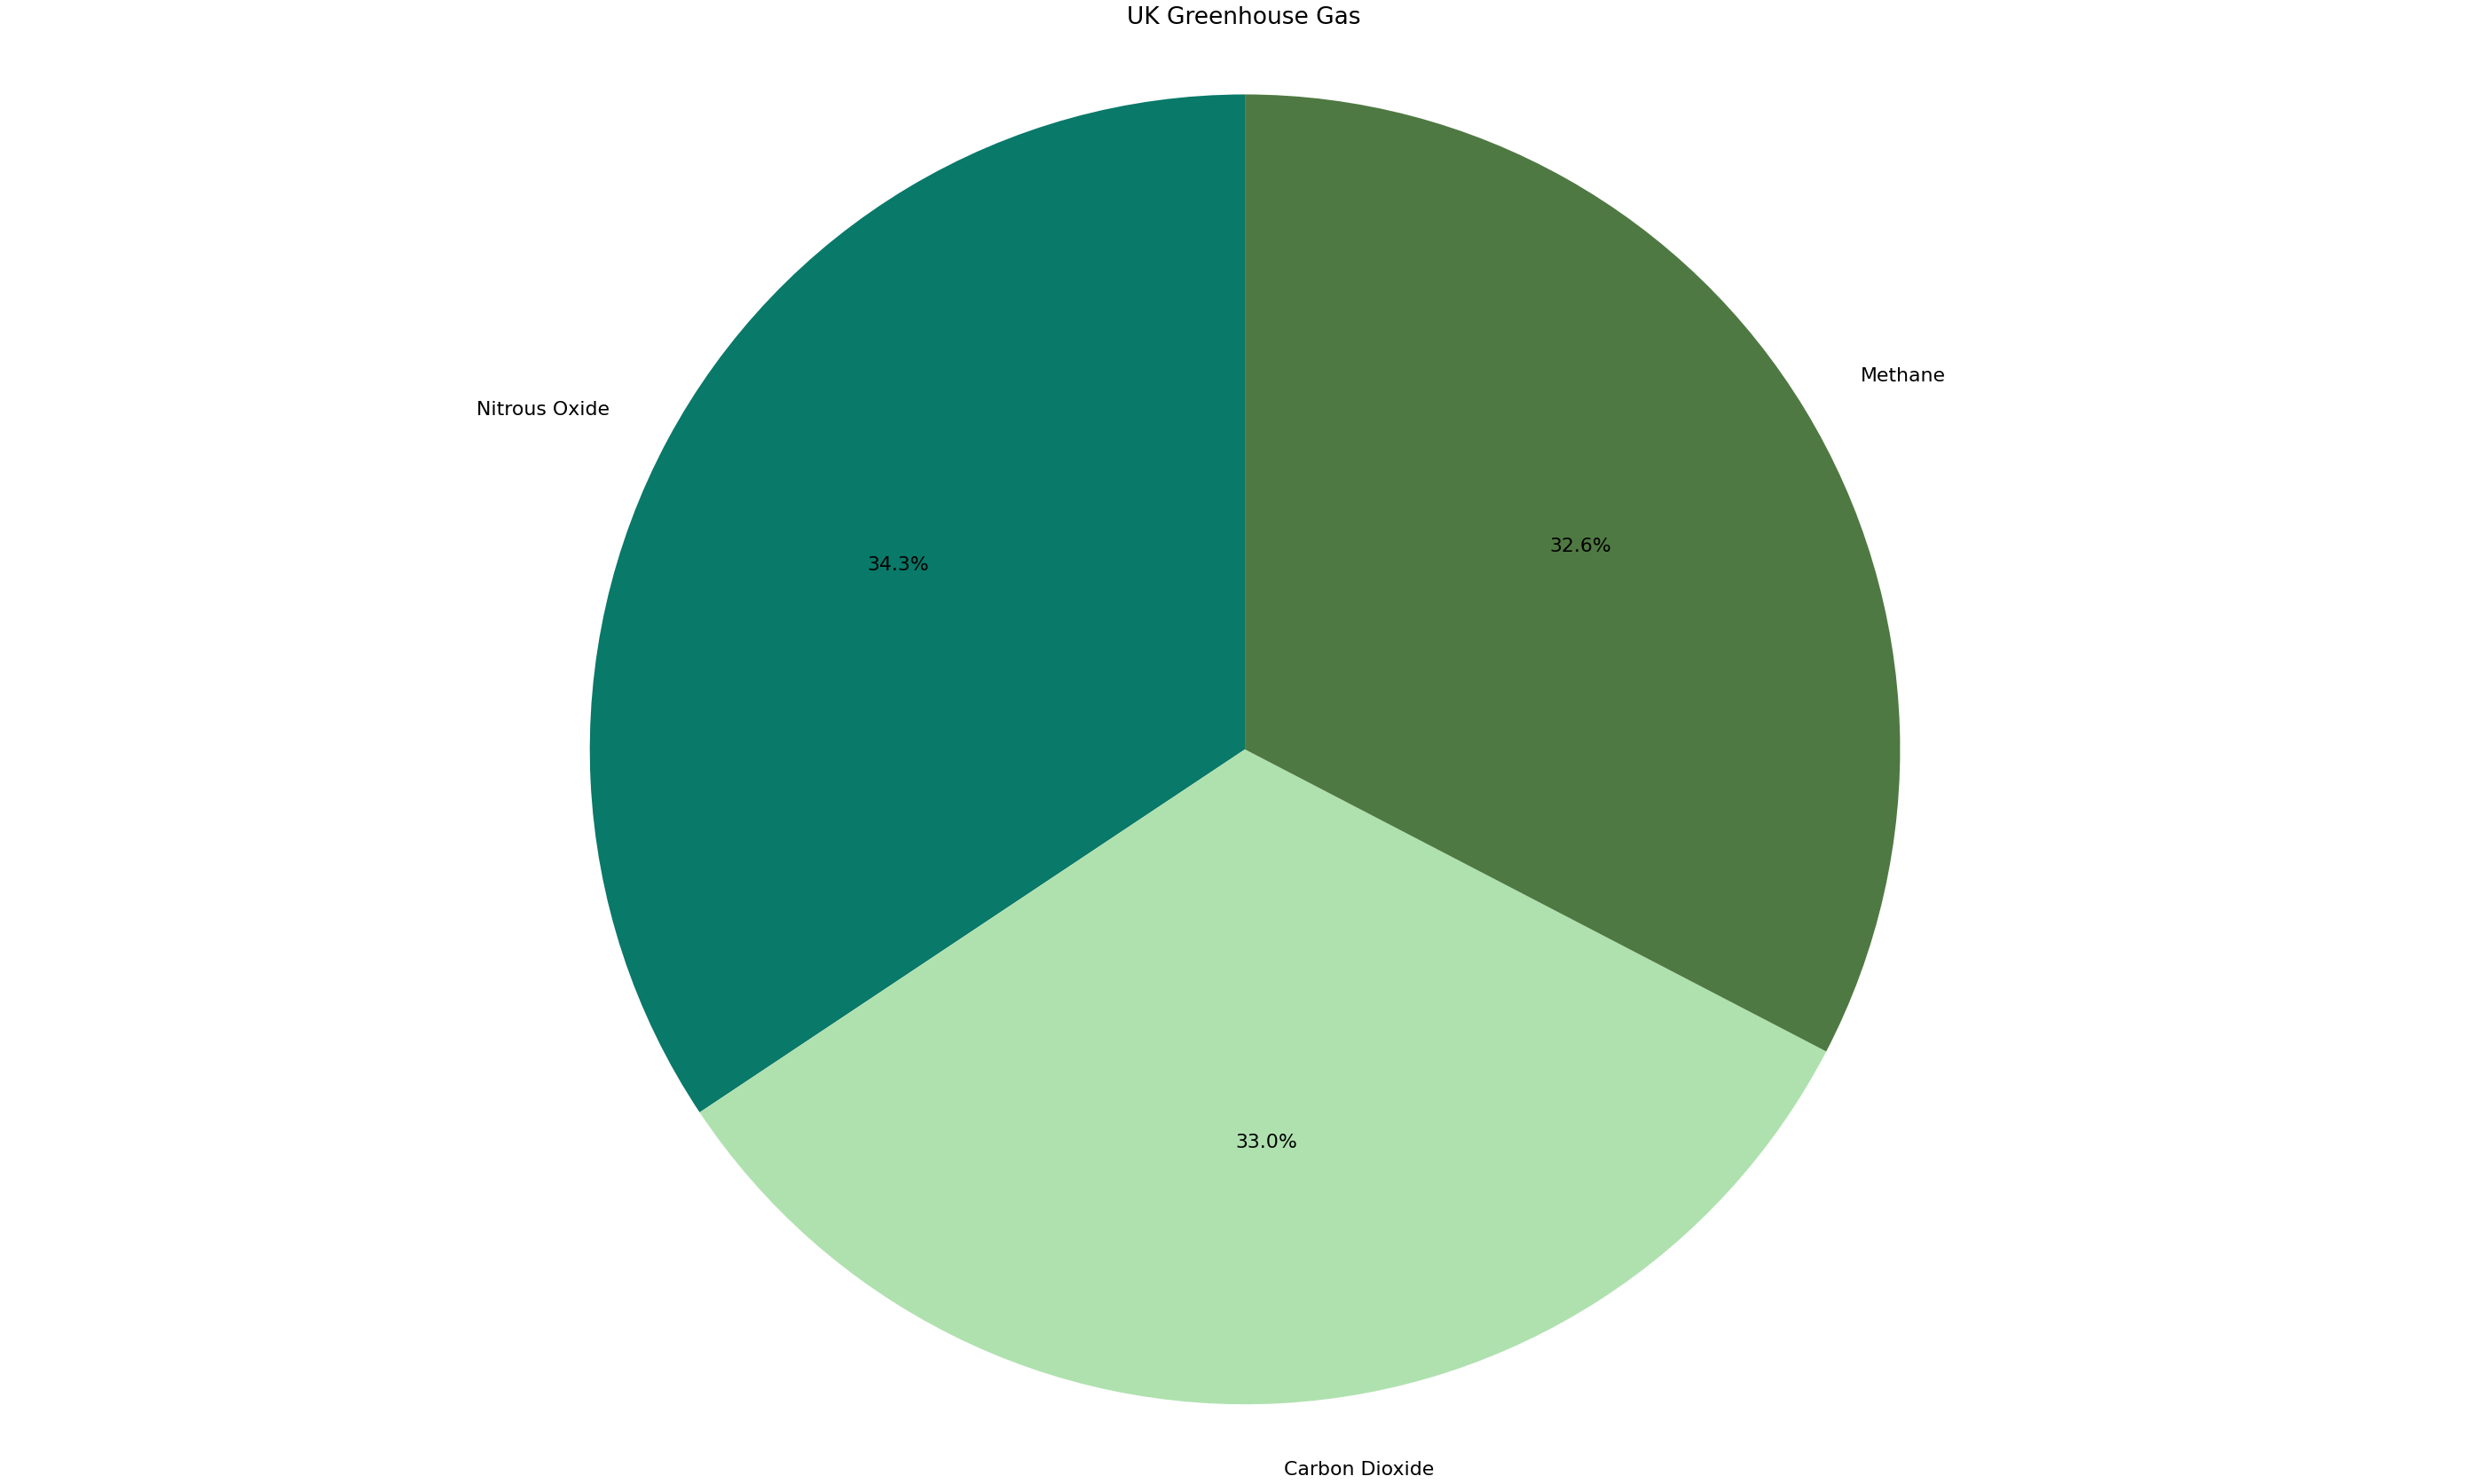

<Figure size 36x36 with 0 Axes>

In [35]:
# Pie chart
perc = [34.35, 33.02, 32.63]
gases = ['Nitrous Oxide', 'Carbon Dioxide', 'Methane']
font = 20

#customization 
colours = ['#097969','#AFE1AF','#4F7942']
fig1, ax1 = plt.subplots()
ax1.pie(perc, colors = colours, labels=gases,autopct='%1.1f%%', startangle=90)
fig = plt.gcf()


ax1.axis('equal') 
plt.title("Overview of UK Greenhouse Gas Emissions (2005 - 2020") 
plt.figure(figsize=(0.5,0.5))
plt.tight_layout()
plt.show()


This column is categorical, the pie chart distributes and visualises the data the best. The relative frequency of greenhouse gases from 2005 to 2020 has been abundant yet stable over the years. As emissions of greenhouse gases increase, the higher the concentrations occur in the atmosphere. 

So, why is this relevant?

To calculate the trends of greenhouse gas emissions within each subsectors over time, I had to investigate and research first about the root of gas emissions. The comparison of different greenhouse gases allows us to showcase the impacts of these gases, also known as calculating GWP (Global warming potential). The GWP is a measure of how much the emissions absorbs energy over a period of time relative to carbon dioxide emissions. Gases with higher GWP absorb more energy and contribute more to warming our Earth.


Carbon dioxide: entered within the atmosphere by burning fossil fuels such as coal, oil, gas)


Nitrous oxide = emitted through agricultural land use and industrial activities

METHANE (CH4) EMISSIONS

From 2005 to 2020, methane (ch4) emissions accounted for almost 32.63% in the UK alone from human activities. Human activities emitting methane include transportation and production of coal, natural resources and oil. These emissions also come from sectors such as livestock, waste management, land use and agriculture practices.



CARBON DIOXIDE EMISSIONS

NITROUS OXIDE EMISSIONS

_____________________________________________________

CARBON DIOXIDE EMISSIONS (2005 TO 2020)

Chemical Formula: CO2e

In [ ]:
#LINE GRAPH 



The line graph displays a time series, fluctuating over the course of almost two decades.

What are C02 emissions? 

C02 expresses the warming effect of different greenhouse gases as an equivalent amount of carbon dioxide. It is the amount of carbon dioxide that would give the same warming effect as each greenhouse gas that is emitted or stored by a sector/activity. 

For example:
METHANE = GWP of 25
1 tonne of methane = 25 tonnes of carbon dioxide. 

The carbon dioxide emissions are continous data, measured in kg, grams or tonnes. Carbon dioxide is naturally present within the atmosphere within the Earths Carbon Cycle. Sectors and factors contributing to the Carbon Emissions alter the carbon cycle and affect the ability for plants and soil to remove and store C02 from the atmosphere. 

These sectors include: 
Agriculture

Commercial: from business and homes, the ghg emissions arise primarily from fossil fuels burned for heat and waste management.

Domestic (electricity + gas)

Industry ( electricity + gas): within the industry comes from burning fossil fuels for energy, as well as greenhouse gas emissions from certain chemical reactions necessary to produce goods from raw materials.

Electricity: (percentage) electricity production generates the second largest share of greenhouse gas emissions, coming from burning fossil fuels, mostly natural gas and coal.

LULUCF - lulucf stands for land use and forestry, land areas can act as a sink and absorb c0s from the atmosphere.
Public Sector

Transport: The transportation sector generates the largest share of ghg gas emissions. greenhouse gas emissions primarily come from burning fossil fuel for cars, trucks, ships, trains and planes. mostly 90% of the fuel used for transportation is petroleum based, which includes primarily gasoline and diesel.

Waste management

DATA TRENDS AND EMISSIONS:

In [36]:
#Finding Max, min, median, mode, mean values

maxClm = gd['CO2 emissions within the scope of influence of LAs (kt CO2e)'].max()
minClm = gd['CO2 emissions within the scope of influence of LAs (kt CO2e)'].min()
medClm = gd['CO2 emissions within the scope of influence of LAs (kt CO2e)'].median()
modeclm = gd['CO2 emissions within the scope of influence of LAs (kt CO2e)'].mode()
meanclm = gd['CO2 emissions within the scope of influence of LAs (kt CO2e)'].mean()
#printing values 

print('\n',"Maximum Value in Column =", maxClm,'\n',
"Minimum Value in Column =", minClm,'\n',
"Median Value in Column =",medClm, '\n',
"Mean Value in Column =",meanclm, '\n',
"Mode Value in Column =",modeclm)


 Maximum Value in Column = 4026.945363 
 Minimum Value in Column = 0.0 
 Median Value in Column = 0.0 
 Mean Value in Column = 12.618935238207818 
 Mode Value in Column = 0    0.0
Name: CO2 emissions within the scope of influence of LAs (kt CO2e), dtype: float64


In [6]:
gd.describe(include='all')

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2e),Mid-year Population (thousands),Area (km2)
count,467443,467088,467443,467088,467088,467443,467443,467443.000000,467443,467443,467443,467443.000000,467443.000000,467443.000000,467443.000000
unique,5,4,13,12,151,377,376,NaN,8,32,3,NaN,NaN,NaN,NaN
top,England,E92000001,South East,E12000008,Scotland,Doncaster,E08000017,NaN,Transport,Industry Electricity,N2O,NaN,NaN,NaN,NaN
freq,385869,385869,79123,79123,40027,1340,1340,NaN,81144,18096,160564,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.548197,NaN,NaN,NaN,16.029964,12.618935,171.972621,671.648052
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.634511,NaN,NaN,NaN,94.186416,49.969305,116.024952,1654.220436
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.000000,NaN,NaN,NaN,-2920.785256,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.000000,NaN,NaN,NaN,0.030717,0.000000,99.383000,97.958400
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,0.472936,0.000000,136.126000,279.042600
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,3.742259,0.000000,212.137000,680.083400


MAPS

Making maps:
columns: country, country code, region, region code
AND
territorial emissions. 

In [59]:
gd.columns

Index(['Country', 'Country Code', 'Region', 'Region Code',
       'Second Tier Authority', 'Local Authority', 'Local Authority Code',
       'Calendar Year', 'LA GHG Sector', 'LA GHG Sub-sector', 'Greenhouse gas',
       'Territorial emissions (kt CO2e)',
       'CO2 emissions within the scope of influence of LAs (kt CO2e)',
       'Mid-year Population (thousands)', 'Area (km2)'],
      dtype='object')

JSON 

https://martinjc.github.io/UK-GeoJSON/json/wal/topo_lad.json
WALES - local authority district


https://martinjc.github.io/UK-GeoJSON/json/eng/topo_lad.json
ENGLAND - local authority district




In [ ]:
# CREATING MAPS 


if os.path.isfile("Regions_(December_2017)_Boundaries.shx"):
    shapefile = "Regions_(December_2017)_Boundaries.shx"
    print("loading from file")
else:
    filepath = "Regions_(December_2017)_Boundaries.shx"
    print("loading from the internet")

s_file = gpd.read_file(shapefile)
print("done")

ATTEMPT 34


In [ ]:
import json
import numpy as np
import pandas as pd
import plotly.express as px

In [ ]:
import plotly.io as pio
pio.renderers.default = 'browser'

In [ ]:
UK_states = json.load(open("Regions_(December_2017)_Boundaries.geojson", "r"))

In [ ]:
state_id_map = {}
for feature in UK_states["features"]:
    feature["Country code"] = feature["properties"]["state_code"]
    state_id_map[feature["properties"]["st_nm"]] = feature["Country code"]

In [ ]:
gd = pd.read_csv("ghg_data.csv")
gd["Territorial emissions (kt CO2e)"] = gd["Mid-year Population (thousands)"].apply(lambda x: int(x.split("/")[0].replace(",", "")))
gd["Country code"] = gd["Country"].apply(lambda x: state_id_map[x])

In [ ]:
gd.head()

In [ ]:
fig = px.choropleth(gd,locations="Country Code",geojson=UK_states,color="DensityScale",
    animation_frame='Calendar Year',
    hover_name="Country",
    hover_data=["Territorial emissions (kt CO2e)"],
    title="Territorial Emissions kt co2e 2005 to 2020",
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()